# 2 Getting Started with Image Processing with Python.


Introduction to Python Imaging Library(PIL)


2.1 Exercise - 1:


1. Read and display the image.


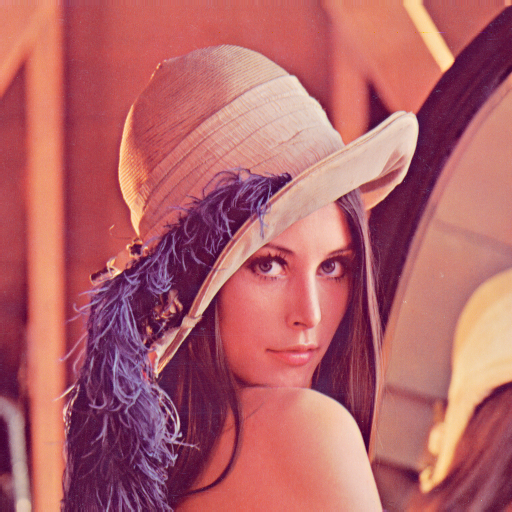

In [ ]:
from PIL import Image

# Display image in colab
image_colored = Image.open("/content/Lenna_(test_image).png")
image_colored.show()
display ( image_colored )

2. Display only the top left corner of 100x100 pixels.

• Extract the top-left corner of the image (100x100 pixels) and display it using NumPy and
Array Indexing.

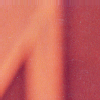

In [11]:
import numpy as np
image_np = np.array(image_colored)
top_left_corner = image_np[:100, :100]
display(Image.fromarray(top_left_corner))


3. Show the three color channels (R, G, B).

Separate the image into its three color channels (Red, Green, and Blue) and display them
individually, labeling each channel as R, G, and B.{Using NumPy.}

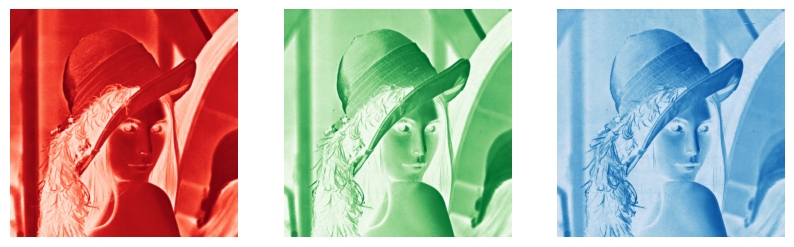

In [18]:
import numpy as np
import matplotlib.pyplot as plt

image_colored = Image.open("/content/Lenna_(test_image).png")
image_array = np.array(image_colored)
r, g, b = image_array[:, :, 0], image_array[:, :, 1], image_array[:, :, 2]
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(r, cmap='Reds')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='Greens')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(b, cmap='Blues')
plt.axis('off')

plt.show()


4. Modify the top 100 × 100 pixels to a value of 210 and display the resulting image:

Modify the pixel values of the top-left 100 × 100 region to have a value of 210

(which is a
light gray color), and then display the modified image.

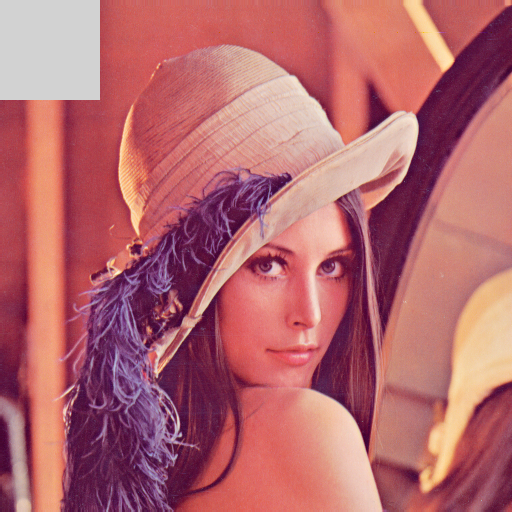

In [19]:
modified_image = image_np.copy()
modified_image[:100, :100] = 210
display(Image.fromarray(modified_image))

#2.2 Exercise - 2:


1. Load and display a grayscale image.

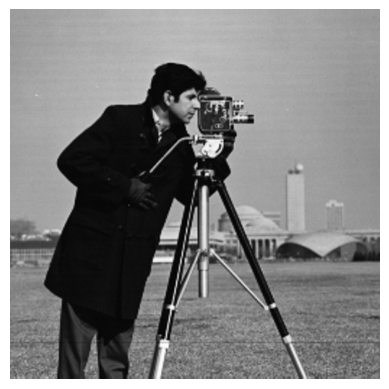

In [10]:
from PIL import Image
import matplotlib.pyplot as plt

image_gray = Image.open("/content/cameraman.png")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()



2. Extract and display the middle section of the image (150 pixels).

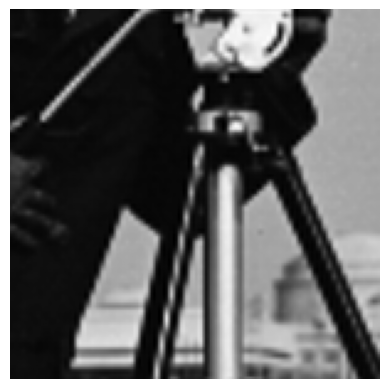

In [24]:
import numpy as np
image_np = np.array(image_gray)
height, width = image_np.shape
center_x = width // 2
center_y = height // 2
cropped_image = image_np[center_y - 75:center_y + 75, center_x - 75:center_x + 75]
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')
plt.show()

3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

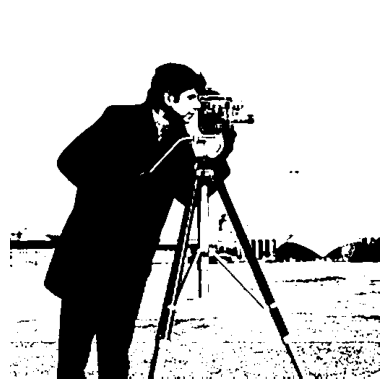

In [25]:
import numpy as np

image = Image.open("/content/cameraman.png")
image_array = np.array(image)
thresholded_image = np.where(image_array < 100, 0, 255)
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')
plt.show()


4.Rotate the image 90 degrees clockwise and display the result.

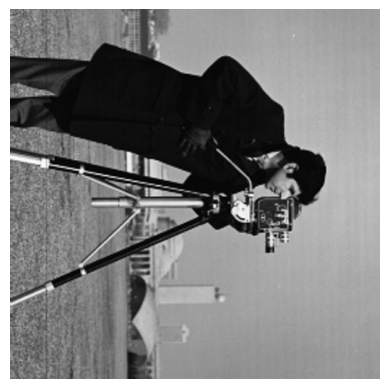

In [27]:
rotated_image = image_gray.rotate(-90)
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')
plt.show()

5. Convert the grayscale image to an RGB image.

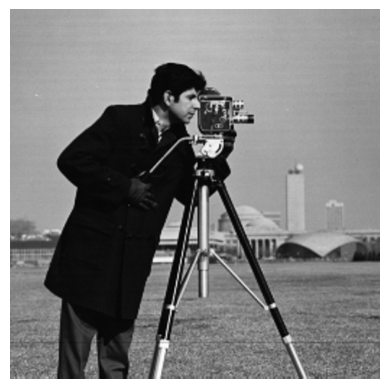

In [28]:
image_gray = Image.open("/content/cameraman.png")
image_gray_array = np.array(image_gray)
image_rgb_array = np.stack((image_gray_array, image_gray_array, image_gray_array), axis=-1)

image_rgb = Image.fromarray(image_rgb_array)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


#3 Image Compression and Decompression using PCA.

1. Load and Prepare Data:

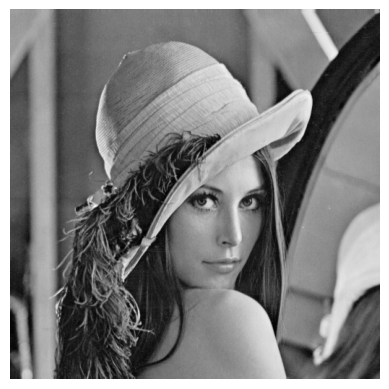

Covariance Matrix:
 1.0000038147118095


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


image = Image.open("/content/Lenna_(test_image).png")
image_gray = image.convert("L")

image_array = np.array(image_gray)
plt.imshow(image_array, cmap='gray')
plt.axis('off')
plt.show()
mean = np.mean(image_array)
centered_data = image_array - mean
std_dev = np.std(centered_data)
standardized_data = centered_data / std_dev
flattened_data = standardized_data.flatten()
flattened_data_2d = flattened_data.reshape(-1, 1)
cov_matrix = np.cov(flattened_data_2d.T)
print("Covariance Matrix:\n", cov_matrix)


2. Eigen Decomposition and Identifying Principal Components:

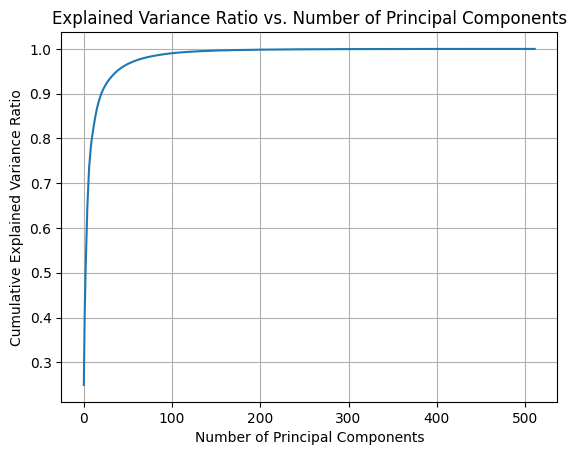

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("/content/Lenna_(test_image).png")
image_gray = image.convert("L")
image_array = np.array(image_gray)
mean = np.mean(image_array, axis=0)
centered_data = image_array - mean
cov_matrix = np.cov(centered_data.T)
from numpy.linalg import eig
eigenvalues, eigenvectors = eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
k = 100
top_k_eigenvectors = sorted_eigenvectors[:, :k]
explained_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)
plt.plot(explained_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()



3. Reconstruction and Experiment:

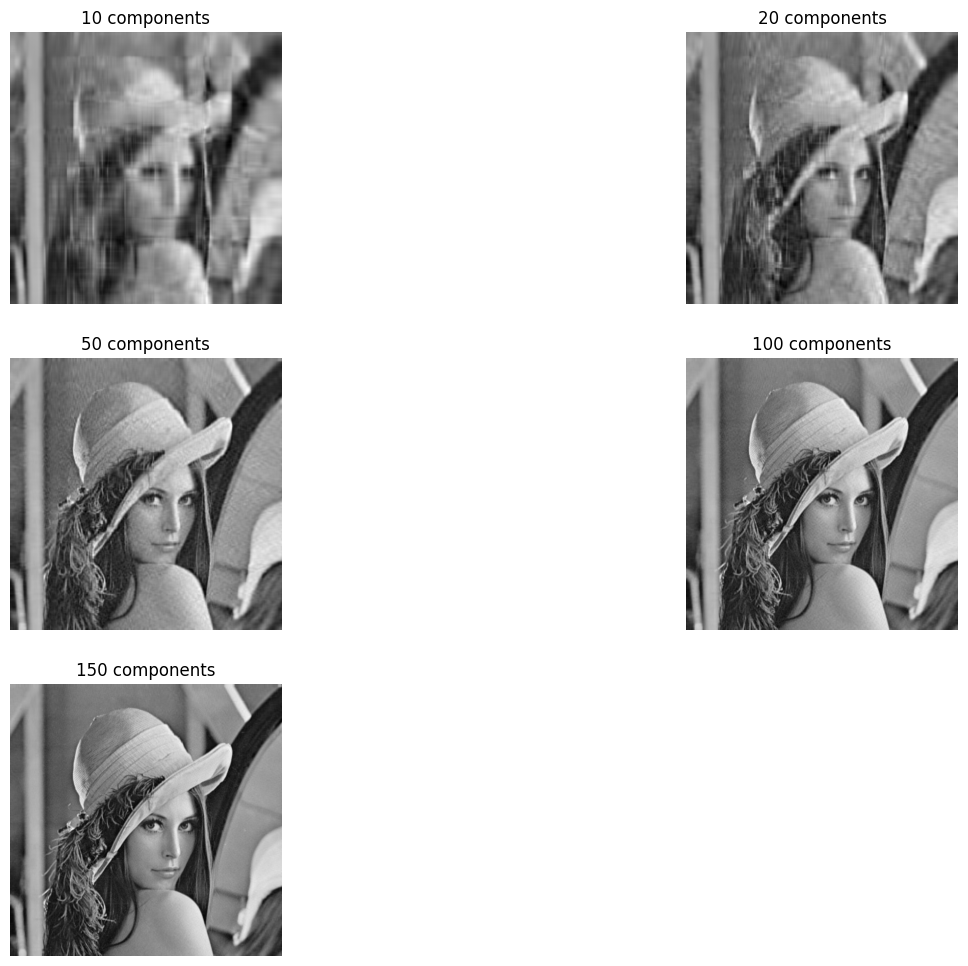

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("/content/Lenna_(test_image).png")
image_gray = image.convert("L")
image_array = np.array(image_gray)
mean = np.mean(image_array, axis=0)
centered_data = image_array - mean
cov_matrix = np.cov(centered_data.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
top_k = [10, 20, 50, 100, 150]
explained_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)
plt.figure(figsize=(16, 12))
for i, k in enumerate(top_k):
    selected_eigenvectors = eigenvectors_sorted[:, :k]
    projected_data = np.dot(centered_data, selected_eigenvectors)
    reconstructed_data = np.dot(projected_data, selected_eigenvectors.T) + mean
    reconstructed_data = np.real(reconstructed_data)
    plt.subplot(3, 2, i + 1)
    plt.imshow(reconstructed_data, cmap='gray')
    plt.title(f"{k} components")
    plt.axis('off')

plt.show()